# Getting started
We start out by loading an image, in this case the lighthouse
from [*TestImages.jl*](https://testimages.juliaimages.org).

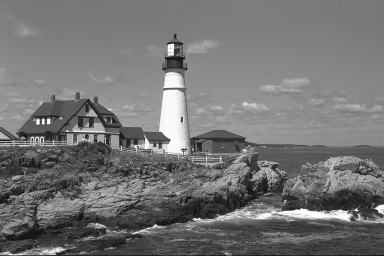

In [1]:
using DitherPunk
using Images
using TestImages

img_color = testimage("lighthouse")
img_color = imresize(img_color; ratio = 1//2)
img_gray = Gray.(img_color) # covert to grayscale

!!! note " Preprocessing"
    Sharpening the image and adjusting the contrast can emphasize the effect of the algorithms. It is highly recommended to play around with algorithms such as those provided by [ImageContrastAdjustment.jl](https://juliaimages.org/ImageContrastAdjustment.jl/stable/)

## Binary dithering
Since we already turned the image to grayscale, we are ready to apply Bayer dithering,
an [ordered dithering](https://en.wikipedia.org/wiki/Ordered_dithering) algorithm that leads to characteristic cross-hatch patterns.

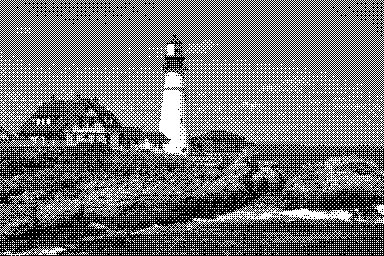

In [2]:
dither(img_gray, Bayer())

### Color spaces
Depending on the method, dithering in sRGB color space can lead to results that are too bright.
To obtain a dithered image that more closely matches the human perception of brightness, grayscale images can be converted to linear color space using the boolean keyword argument `to_linear`.

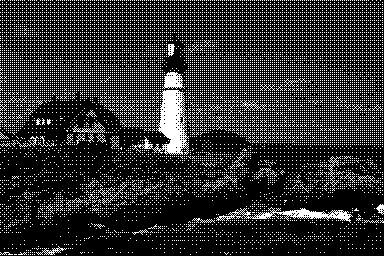

In [3]:
dither(img_gray, Bayer(); to_linear=true)

## Separate-space dithering
All dithering algorithms in DitherPunk can also be applied to color images through the meta-method `SeparateSpace`.
This method takes any dithering algorithm and applies channel-wise binary dithering.

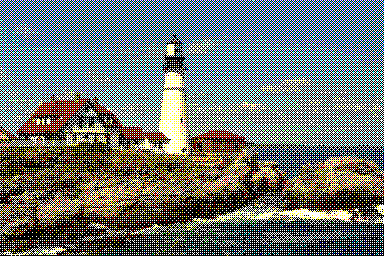

In [4]:
dither(img_color, SeparateSpace(Bayer()))

Any algorithm can be used, not only bayer dithering!

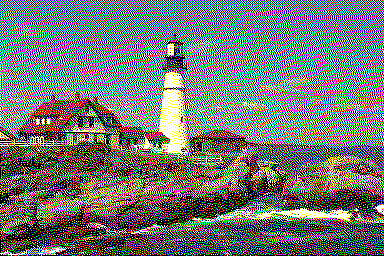

In [5]:
dither(img_color, SeparateSpace(FloydSteinberg()))

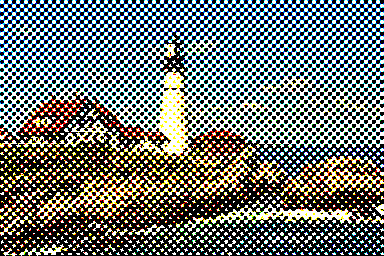

In [6]:
dither(img_color, SeparateSpace(Rhombus()))

!!! note
    Because the algorithm is applied once per channel, the output of this algorithm depends on the color type of input image. `RGB` is recommended, but feel free to experiment!

## Dithering with custom colors
Let's assume we want to recreate an image by stacking ``50 \times 50`` Rubik's cubes. Dithering algorithms are perfect for this task!
We start out by defining a custom color scheme:

In [7]:
white = RGB{Float32}(1, 1, 1)
yellow = RGB{Float32}(1, 1, 0)
green = RGB{Float32}(0, 0.5, 0)
orange = RGB{Float32}(1, 0.5, 0)
red = RGB{Float32}(1, 0, 0)
blue = RGB{Float32}(0, 0, 1)

rubiks_colors = [white, yellow, green, orange, red, blue]

Now we only have to pick an image

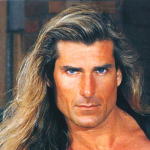

In [8]:
img = testimage("fabio_color_256")
img = imresize(img, 150, 150)

and run an `ErrorDiffusion` algorithm of our choice, e.g. `FloydSteinberg`:

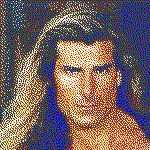

In [9]:
d = dither(img, FloydSteinberg(), rubiks_colors)

this looks much better than simply quantizing to the closest color!

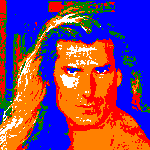

In [10]:
d = dither(img, ClosestColor(), rubiks_colors)

For an overview of all error diffusion algorithms, check out the [gallery].

### Using ColorSchemes.jl
Predefined color schemes from [ColorSchemes.jl](https://juliagraphics.github.io/ColorSchemes.jl/stable/basics/#Pre-defined-schemes) can also be used by accessing the color scheme's `colors`.
Here we use ColorSchemes.jl to dither in the colors of the Brazilian flag 🇧🇷:

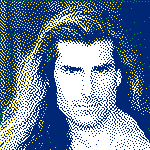

In [11]:
using ColorSchemes
cs = ColorSchemes.flag_br

dither(img, Atkinson(), cs.colors)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*